In [1]:
!pip3 install pillow
!pip3 install torch==1.10.0
!git clone https://github.com/salesforce/LAVIS.git
!cd LAVIS
!pip3 install LAVIS/


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |██████████████████████████████▎ | 834.1 MB 1.2 MB/s eta 0:00:41tcmalloc: large alloc 1147494400 bytes == 0x393c6000 @  0x7fdf0d30a615 0x5d6f4c 0x51edd1 0x51ef5b 0x4f750a 0x4997a2 0x4fd8b5 0x4997c7 0x4fd8b5 0x49abe4 0x4f5fe9 0x55e146 0x4f5fe9 0x55e146 0x4f5fe9 0x55e146 0x5d8868 0x5da092 0x587116 0x5d8d8c 0x55dc1e 0x55cd91 0x5d8941 0x49abe4 0x55cd91 0x5d8941 0x4990ca 0x5d8868 0x4997a2 0x4fd8b5 0x49abe4
     |████████████████████████████████| 881.9 MB 4.5 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.13.0+cu116
    Uninstalling torch-1.13.0+cu116:
      Successfully uninstalled torch-1.13.0+cu116
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency 

In [2]:
import torch
import requests

from PIL import Image

from lavis.models import load_model_and_preprocess

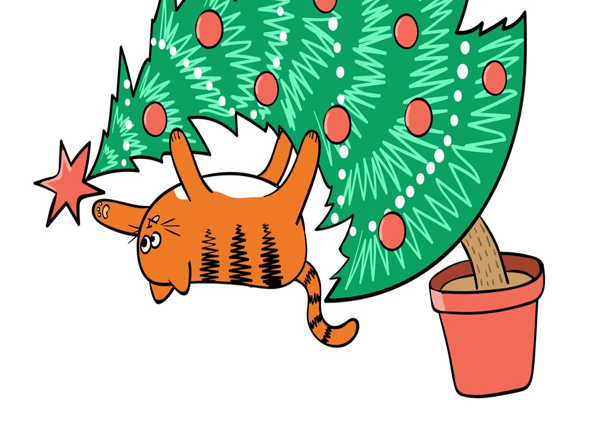

In [7]:
url = 'https://www.vettimes.co.uk/app/uploads/2016/12/Dec15_JS-blog-Xmas-tree_Fotolia-Afanasia_feature.jpg'
r = requests.get(url)
with open("cat.jpg", "wb") as outfile:
  outfile.write(r.content)

raw_image = Image.open("cat.jpg").convert("RGB")
display(raw_image.resize((596, 437)))

In [8]:
from PIL import Image
import requests
import torch
from torchvision import transforms
from torchvision.transforms.functional import InterpolationMode

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def load_demo_image(image_size,device):
    img_url = 'https://www.vettimes.co.uk/app/uploads/2016/12/Dec15_JS-blog-Xmas-tree_Fotolia-Afanasia_feature.jpg' 
    raw_image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')   

    w,h = raw_image.size
    display(raw_image.resize((w//5,h//5)))
    
    transform = transforms.Compose([
        transforms.Resize((image_size,image_size),interpolation=InterpolationMode.BICUBIC),
        transforms.ToTensor(),
        transforms.Normalize((0.48145466, 0.4578275, 0.40821073), (0.26862954, 0.26130258, 0.27577711))
        ]) 
    image = transform(raw_image).unsqueeze(0).to(device)   
    return image

In [9]:
from PIL import Image
import requests
import torch
from torchvision import transforms
from torchvision.transforms.functional import InterpolationMode

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def load_demo_image(image_size,device):
    img_url = 'https://www.vettimes.co.uk/app/uploads/2016/12/Dec15_JS-blog-Xmas-tree_Fotolia-Afanasia_feature.jpg' 
    raw_image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')   

    w,h = raw_image.size
    display(raw_image.resize((w//5,h//5)))
    
    transform = transforms.Compose([
        transforms.Resize((image_size,image_size),interpolation=InterpolationMode.BICUBIC),
        transforms.ToTensor(),
        transforms.Normalize((0.48145466, 0.4578275, 0.40821073), (0.26862954, 0.26130258, 0.27577711))
        ]) 
    image = transform(raw_image).unsqueeze(0).to(device)   
    return image

In [10]:
# setup device to use
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#### Load BLIP large captioning model finetuned on COCO

In [11]:
# we associate a model with its preprocessors to make it easier for inference.
model, vis_processors, _ = load_model_and_preprocess(
    name="blip_caption", model_type="large_coco", is_eval=True, device=device
)
# uncomment to use base model
# model, vis_processors, _ = load_model_and_preprocess(
#     name="blip_caption", model_type="base_coco", is_eval=True, device=device
# )
vis_processors.keys()

  0%|          | 0.00/1.66G [00:00<?, ?B/s]

dict_keys(['train', 'eval'])

#### prepare the image as model input using the associated processors

In [12]:
image = vis_processors["eval"](raw_image).unsqueeze(0).to(device)

#### generate caption using beam search

In [13]:
model.generate({"image": image})

['a cat is playing with a christmas tree']

#### generate multiple captions using nucleus sampling

In [14]:
# due to the non-determinstic nature of necleus sampling, you may get different captions.
model.generate({"image": image}, use_nucleus_sampling=True, num_captions=3)

['a cat is on its back playing with a christmas tree',
 'an orange cat reaching up to a christmas tree',
 'a cat on a tree with an orange christmas star']